# Subreddit Analyzing 

This project aims to conduct a comparative analysis of two subreddits over a three-month period, utilizing both analytical and behavioral perspectives.

## Metrics:
Five distinct metrics have been employed to illustrate various post characteristics within the subreddits:
* ups: number of users who liked the post
* user engagement ratio: Demonstrates the ratio of individuals who like a post relative to the total number of subscribers in the subreddit.
* upvote ratio: Represents the ratio of ups to the total number of votes received.
* number of comments: Indicates the count of comments per post.
* title length: Measures the length of post titles.

## Data Management

In [34]:
import pandas as pd
import numpy as np
import os

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from fitter import Fitter, get_common_distributions

In [56]:
folder_path = './Datasets/' 
# Get a list of all files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

if len(file_list) >= 2:
    subreddit_1 = pd.read_csv(os.path.join(folder_path, file_list[0]))
    subreddit_2 = pd.read_csv(os.path.join(folder_path, file_list[1]))
else:
    print("The number of subreddits are not sufficient")

columns = subreddit_1.columns[1:]
subreddits = [file.split('.')[0] for file in file_list]

In [38]:
subreddit_1

,identifier,ups,User Engagement Ratio,upvote ratio,nummber of comments,title length
0,t3_18y5g63,2,0.000012,1.00,3,48
1,t3_18y3k88,1,0.000006,1.00,0,38
2,t3_18y19za,0,0.000000,0.33,2,76
3,t3_18xxgqv,4,0.000024,0.83,18,42
4,t3_18xpv27,2,0.000012,1.00,3,71
...,...,...,...,...,...,...
1334,t3_171ac3p,1,0.000015,0.67,6,67
1335,t3_1719lq6,33,0.000481,0.95,2,40
1336,t3_1718027,4,0.000058,0.84,1,70
1337,t3_1717vhy,13,0.000190,1.00,1,46


In [40]:
subreddit_2

,identifier,ups,User Engagement Ratio,upvote ratio,nummber of comments,title length
0,t3_18y5g63,2,0.000012,1.00,3,48
1,t3_18y3k88,1,0.000006,1.00,0,38
2,t3_18y19za,0,0.000000,0.33,2,76
3,t3_18xxgqv,4,0.000024,0.83,18,42
4,t3_18xpv27,2,0.000012,1.00,3,71
...,...,...,...,...,...,...
376,t3_16zzgyt,0,0.000000,0.29,0,97
377,t3_16zyick,2,0.000012,0.75,5,79
378,t3_16zlzej,83,0.000504,0.92,82,40
379,t3_16zemde,6,0.000036,0.75,7,51


In [71]:
# Implement feature scaling on User Engagement Ratio
subreddit_1['User Engagement Ratio'] = subreddit_1['User Engagement Ratio'] * (10**2)
subreddit_2['User Engagement Ratio'] = subreddit_2['User Engagement Ratio'] * (10**2)

## Distribution Analysis using Various Plotting Libraries

Three distinct Python libraries utilized to visualize and analyze the distribution of subreddit data 
1. matplotlib: Generating histograms and density plots to represent subreddit distributions.
2. seaborn: Constructing box plots to visualize the distributional properties of subreddits.
3. fitter: Determining the best-fit distribution that aligns with the subreddit dataset.

### Histogram

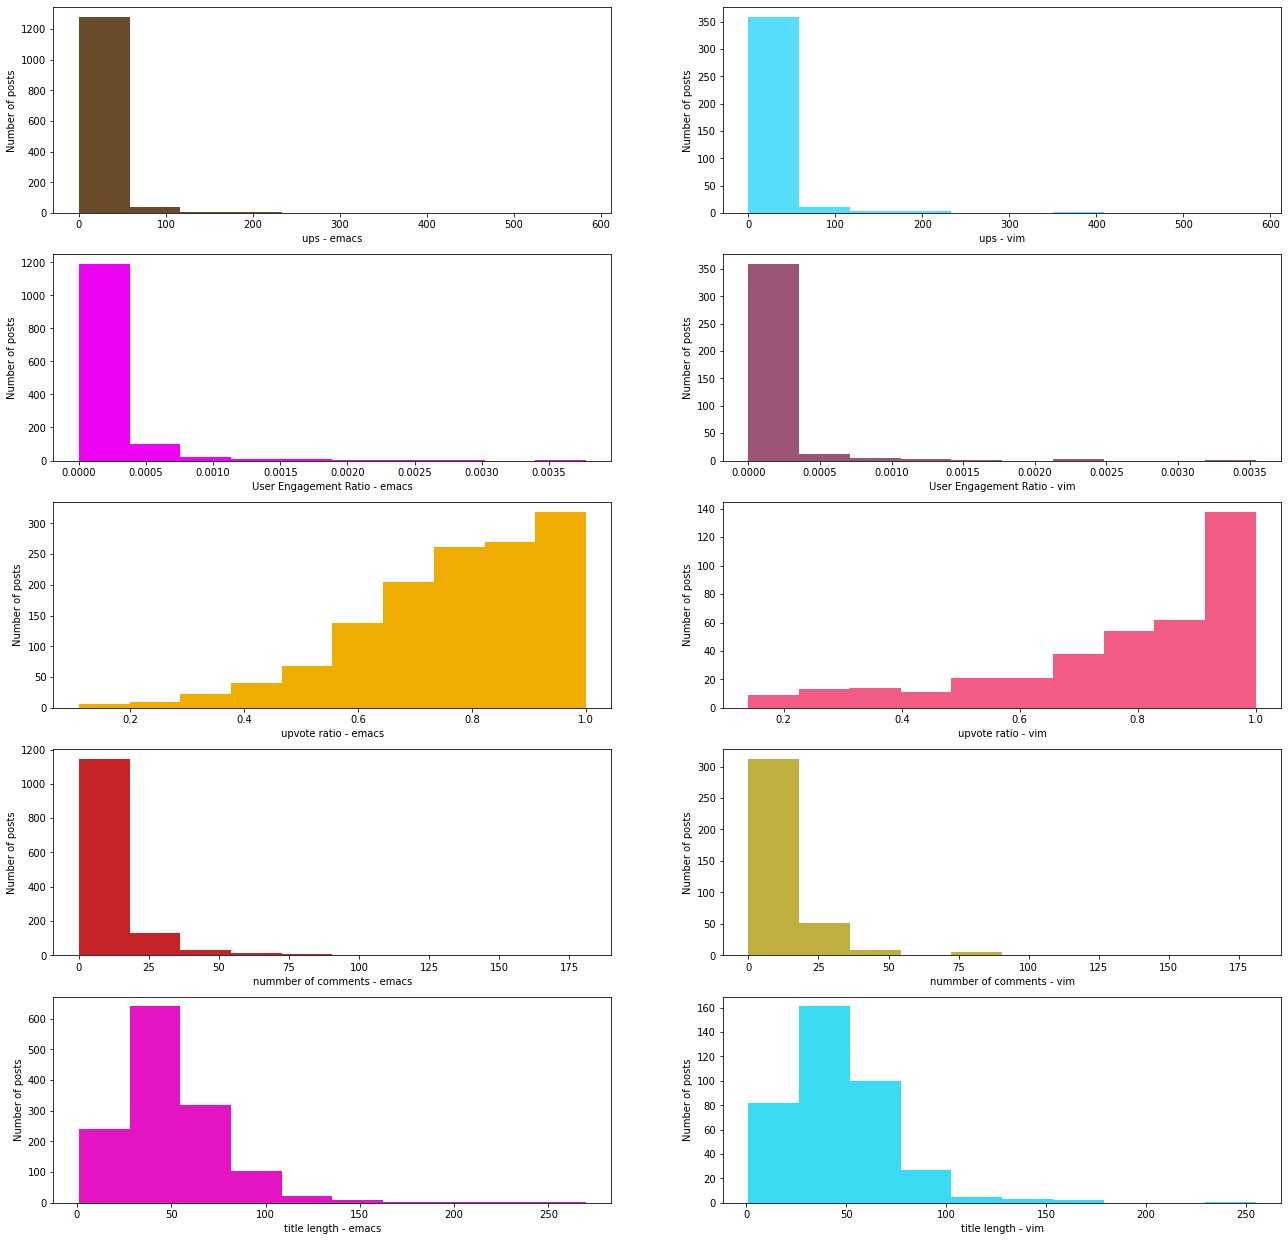

In [57]:
# Generate histogram for all 5 metrics in subreddits
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(22, 22))
col_num = 0
row_num = 0

for col in columns:
    ax[row_num, col_num].set(xlabel= f"{col} - {subreddits[0]}", ylabel="Number of posts")
    # display plot
    ax[row_num, col_num].hist(subreddit_1[col], color = np.random.rand(3,))

    ax[row_num, col_num + 1].set(xlabel= f"{col} - {subreddits[1]}", ylabel="Number of posts")
    # display plot
    ax[row_num, col_num + 1].hist(subreddit_2[col], color = np.random.rand(3,))
    row_num += 1

#### Density Plot
Create density plots to understand distributions, Modes, and Skewness of each subreddit

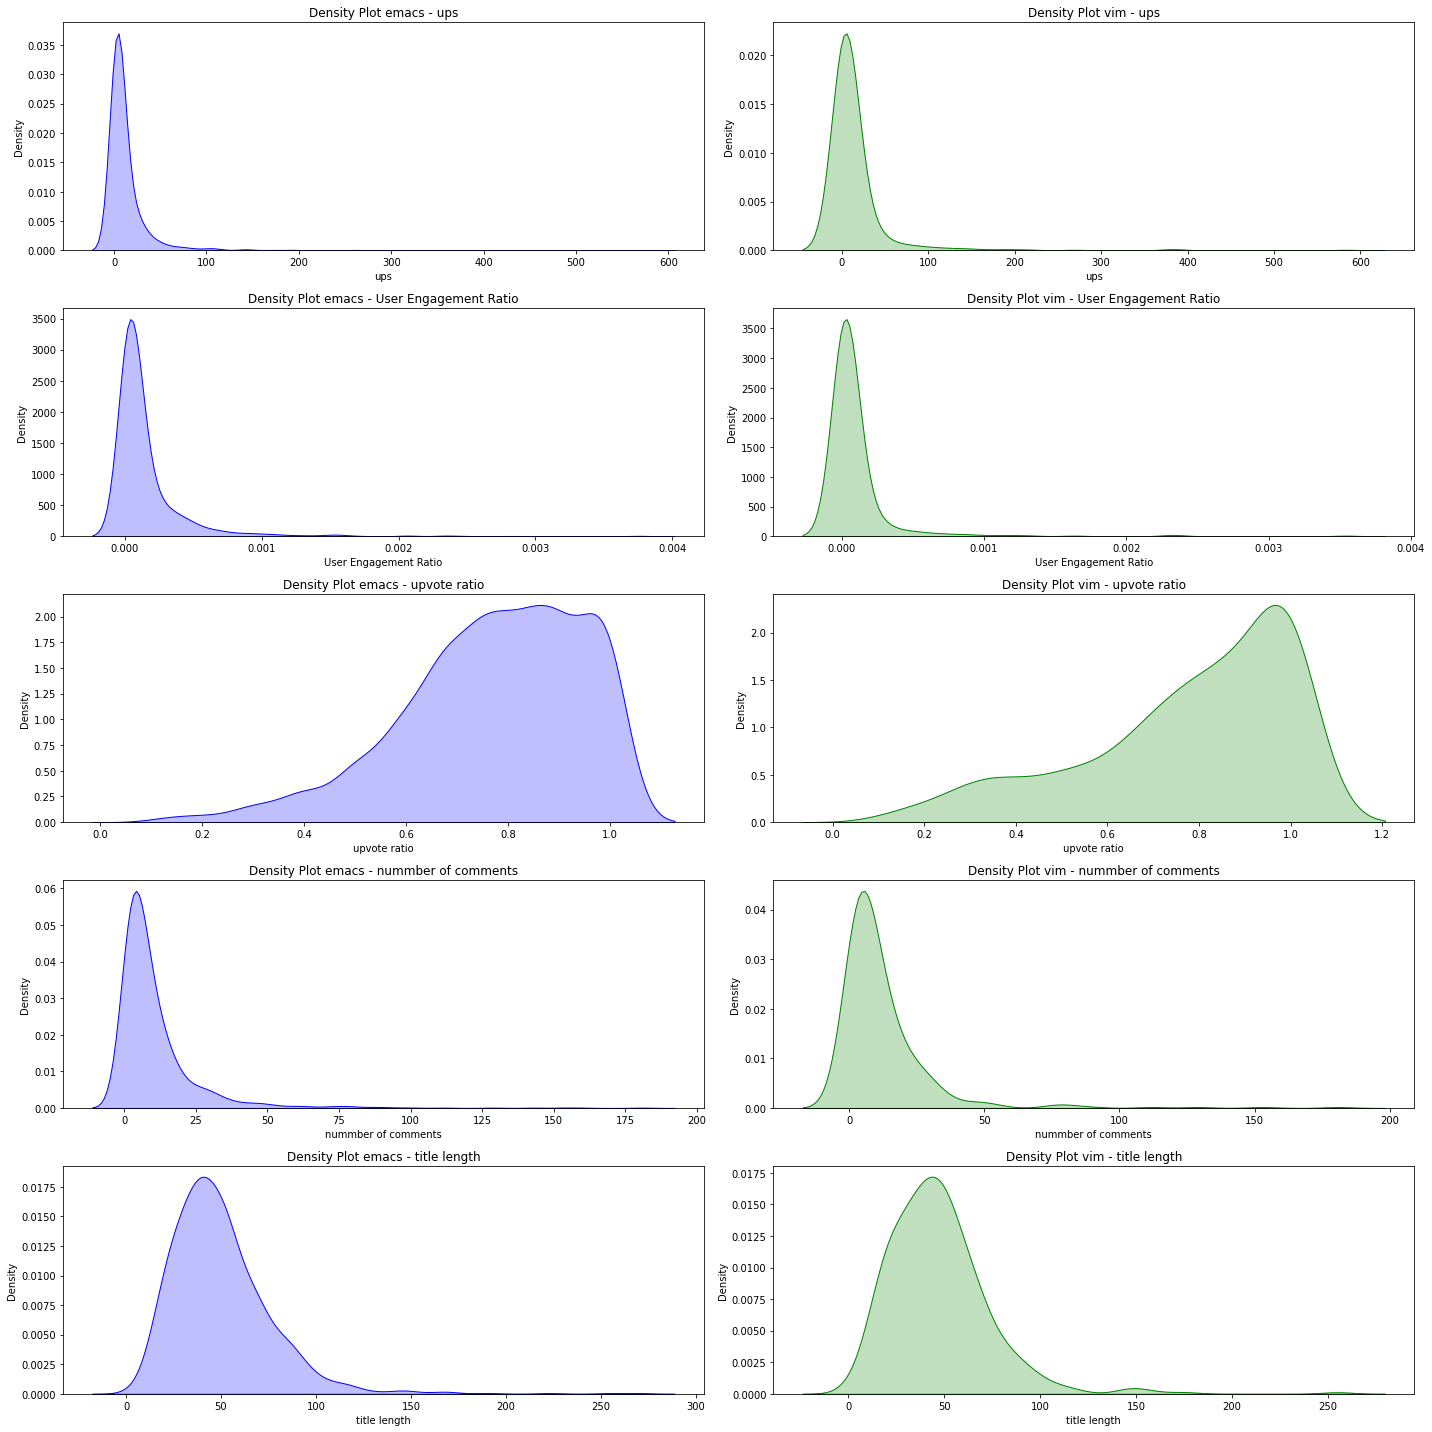

In [58]:
# Generate histogram for all 5 metrics in subreddits
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
col_num = 0
row_num = 0
ax = ax.flatten()

for col in columns:
    sns.kdeplot(subreddit_1[col], ax=ax[col_num*2], color='blue', shade=True)
    ax[col_num*2].set_title(f'Density Plot {subreddits[0]} - ' + col)

    sns.kdeplot(subreddit_2[col], ax=ax[col_num  * 2 + 1], color='green', shade=True)
    ax[col_num  * 2 + 1].set_title(f'Density Plot {subreddits[1]} - ' + col)
    col_num += 1
    
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Box Plot

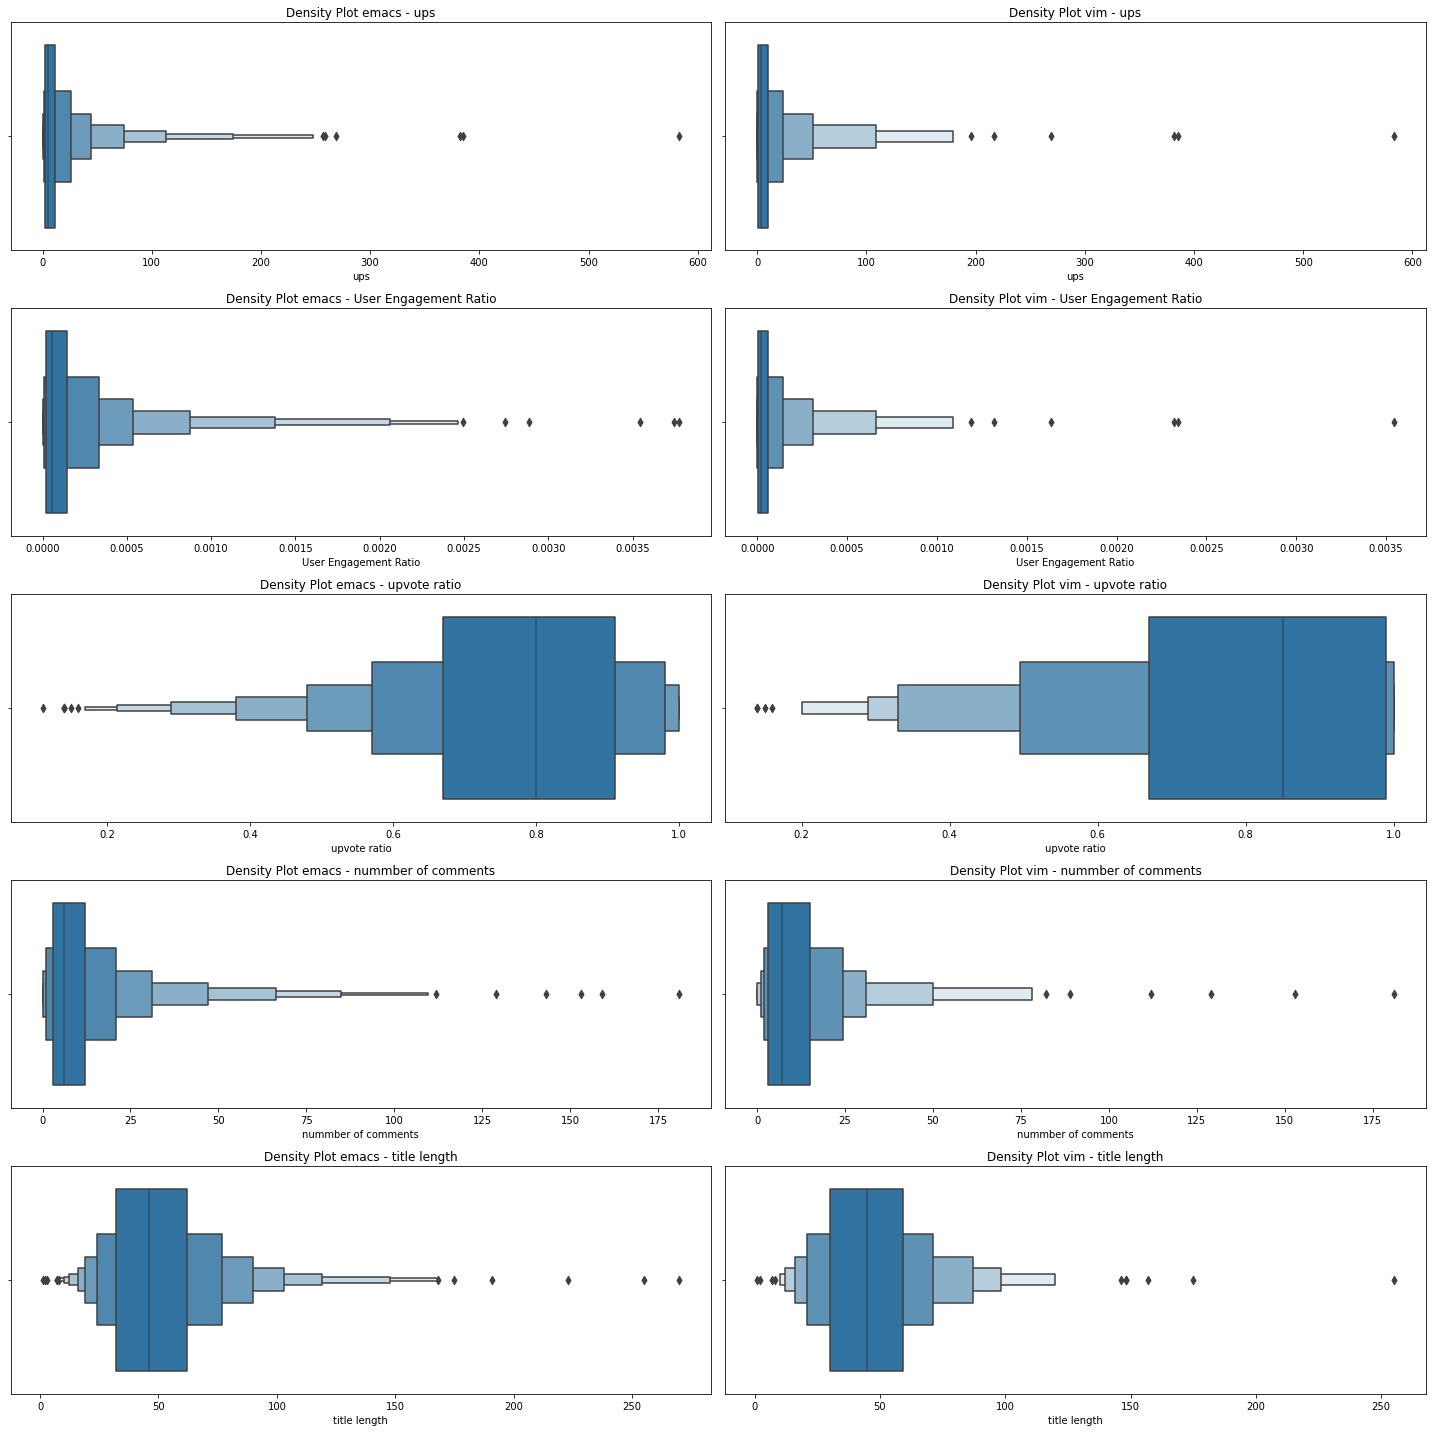

In [59]:
# Create histogram for all 5 metrics in the vim subreddit
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
col_num = 0
row_num = 0
ax = ax.flatten()

for col in columns:
    sns.boxenplot(x = subreddit_1[col], ax=ax[col_num*2])
    ax[col_num*2].set_title(f'Density Plot {subreddits[0]} - ' + col)

    sns.boxenplot(x = subreddit_2[col], ax=ax[col_num  * 2 + 1])
    ax[col_num  * 2 + 1].set_title(f'Density Plot {subreddits[1]} - ' + col)
    col_num += 1
    
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


The Fitter library might be lesser-known among data scientists, yet it proved to be an invaluable tool for accurately determining data distributions. This library significantly simplifies the process of fitting various probability distributions to the provided dataset, aiding in the identification of the most suitable distribution model.

<br> For further exploration and in-depth understanding of the Fitter library, interested individuals can access additional information and detailed documentation through this link: https://fitter.readthedocs.io/en/latest/.

emacs - "ups" best fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

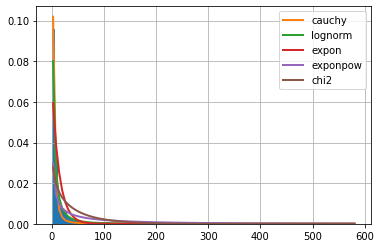

Best: cauchy distribution

emacs - "User Engagement Ratio" best fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

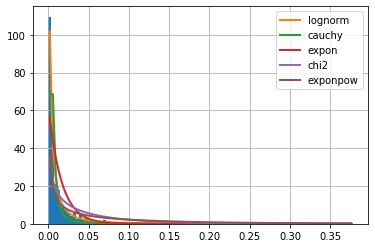

Best: lognorm distribution

emacs - "upvote ratio" best fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

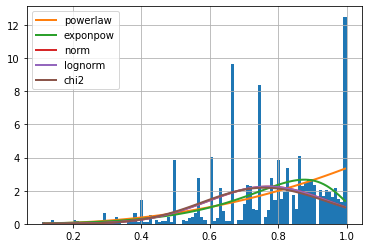

Best: powerlaw distribution

emacs - "nummber of comments" best fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

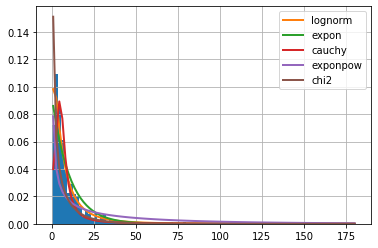

Best: lognorm distribution

emacs - "title length" best fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

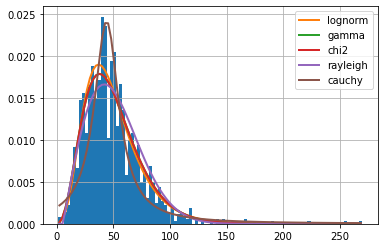

Best: lognorm distribution



In [72]:
# Instructions and information mentioned above
common_dist = get_common_distributions()
dic = {'Name' : [],
       'Distribution' : []}
for col in columns:
    print(f'{subreddits[0]} - "{col}" best fitting distribution is:')
    f = Fitter(subreddit_1[col],
               distributions= common_dist,
              )
    f.fit(progress=True);
    f.summary()
    plt.show()
    print('Best:', list(f.get_best(method = 'sumsquare_error').keys())[0], 'distribution\n')

vim - "ups" best fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

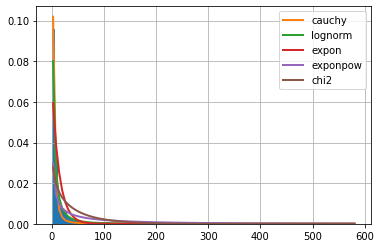

Best: cauchy distribution

vim - "User Engagement Ratio" best fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

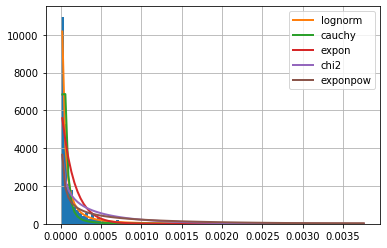

Best: lognorm distribution

vim - "upvote ratio" best fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

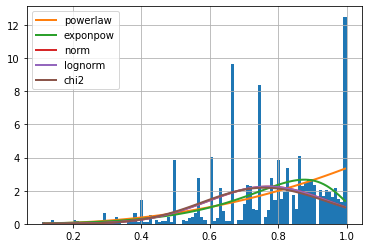

Best: powerlaw distribution

vim - "nummber of comments" best fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

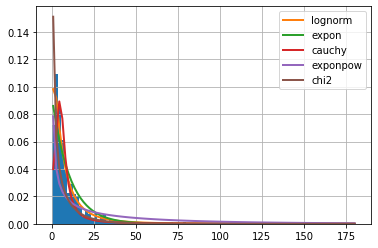

Best: lognorm distribution

vim - "title length" best fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

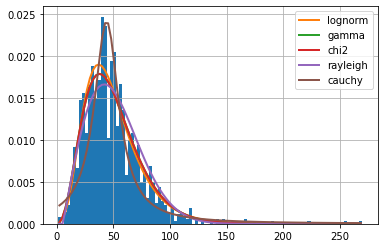

Best: lognorm distribution



In [61]:
# Instructions and information mentioned above
common_dist = get_common_distributions()
dic = {'Name' : [],
       'Distribution' : []}
for col in columns:
    print(f'{subreddits[1]} - "{col}" best fitting distribution is:')
    f = Fitter(subreddit_1[col],
               distributions= common_dist,
              )
    f.fit(progress=True);
    f.summary()
    plt.show()
    print('Best:', list(f.get_best(method = 'sumsquare_error').keys())[0], 'distribution\n')

# Behavioral Analysis

In this section information about users' behaviour and trends would be examined

In [62]:
subreddits_ = [subreddit_1, subreddit_2]
import warnings

# Suppress warning regarding the version of numpy
warnings.filterwarnings("ignore")

for subreddit in subreddits_:
    display([name for name, value in globals().items() if value is subreddit][0])
    stats_summary = subreddit.describe().transpose()[['min', 'max', '50%', 'mean', 'std']]
    stats_summary['Variance'] = emacs.var().round(2)
    stats_summary.columns = ['Minimum', 'Maximum', 'Median', 'Mean', 'STD', 'Variance']
    stats_summary = stats_summary.round(2)
    display(stats_summary)

'subreddit'

,Minimum,Maximum,Median,Mean,STD,Variance
ups,0.00,583.0,5.0,13.60,33.25,566.17
User Engagement Ratio,0.00,0.0,0.0,0.00,0.00,0.00
upvote ratio,0.11,1.0,0.8,0.77,0.18,0.02
nummber of comments,0.00,181.0,6.0,10.69,15.78,205.08
title length,1.00,270.0,46.0,49.78,26.46,680.64


'subreddit'

,Minimum,Maximum,Median,Mean,STD,Variance
ups,0.00,583.0,4.00,16.26,49.51,566.17
User Engagement Ratio,0.00,0.0,0.00,0.00,0.00,0.00
upvote ratio,0.14,1.0,0.85,0.78,0.23,0.02
nummber of comments,0.00,181.0,7.00,12.38,18.82,205.08
title length,1.00,255.0,45.00,47.41,27.07,680.64


### Correlation Matrix

In [68]:
def correlation_matrix(df, size=7):
    plt.figure(figsize=(size+3,size))
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix, annot=True, fmt="5.2f")
    plt.show()

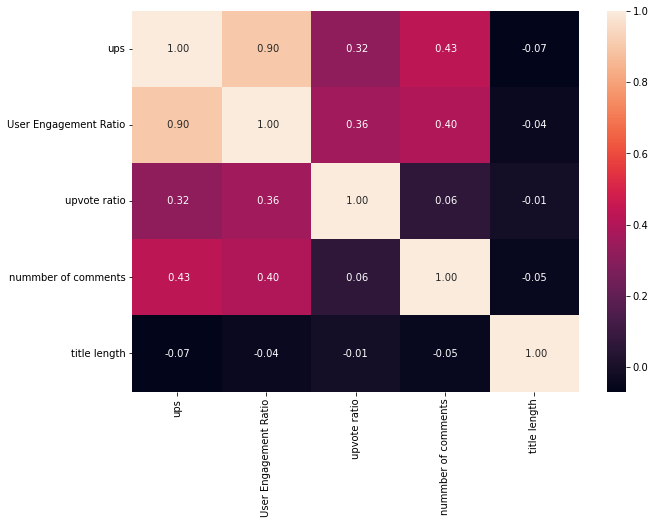

In [73]:
# First subreddit correlation matrix
correlation_matrix(subreddit_1)


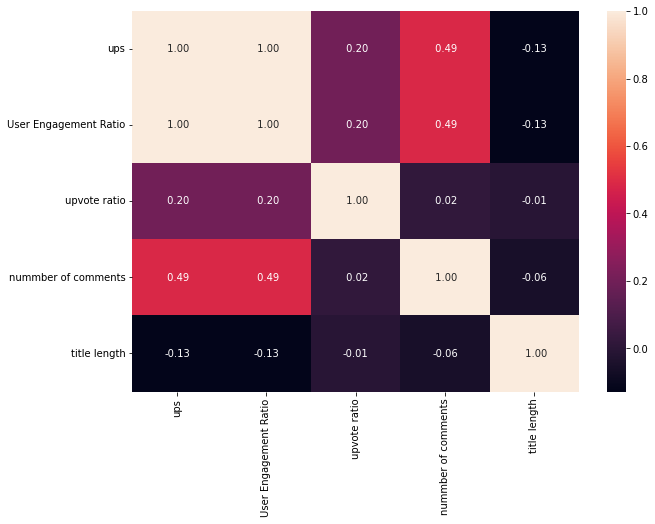

In [74]:
# Second subreddit Correlation Matrix
correlation_matrix(subreddit_2)
